<a href="https://colab.research.google.com/github/tanupat085/test/blob/master/qc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install qiskit

     |████████████████████████████████| 6.1 MB 4.4 MB/s 
     |████████████████████████████████| 18.0 MB 119 kB/s 
     |████████████████████████████████| 234 kB 49.8 MB/s 
     |████████████████████████████████| 207 kB 48.2 MB/s 
     |████████████████████████████████| 2.1 MB 38.3 MB/s 
     |████████████████████████████████| 199 kB 49.8 MB/s 
     |████████████████████████████████| 1.4 MB 36.4 MB/s 
     |████████████████████████████████| 635 kB 32.1 MB/s 
     |████████████████████████████████| 68 kB 5.9 MB/s 
     |████████████████████████████████| 943 kB 42.4 MB/s 
     |████████████████████████████████| 49 kB 5.3 MB/s 
     |████████████████████████████████| 33.9 MB 19 kB/s 
     |████████████████████████████████| 3.2 MB 37.2 MB/s 
     |████████████████████████████████| 6.3 MB 19.5 MB/s 
  Created wheel for qiskit: filename=qiskit-0.28.0-py3-none-any.whl size=11090 sha256=89b117e4e0f5650efdb01d5e7022200962dfb3999e2df3fe27720a6bd1bb6d74
  Stored in directory: /root/.cache/pip/whe

In [4]:
import qiskit
qiskit.__version__

'0.18.0'

In [21]:
from matplotlib import pyplot as plt
import numpy as np
from qiskit.ml.datasets import breast_cancer
from qiskit import BasicAer
from qiskit.aqua import QuantumInstance
from qiskit.circuit.library import ZZFeatureMap
from qiskit.aqua.algorithms import QSVM
from qiskit.aqua.utils import split_dataset_to_data_and_labels , map_label_to_class_name

<function qiskit.ml.datasets.breast_cancer.breast_cancer>

In [25]:
feature_dim = 2
training_dataset_size = 20
testing_dataset_size = 10
random_seed = 10598
shot = 10000

sample_Total , training_input , test_input , class_labels = breast_cancer(training_size=training_dataset_size
                                                                        ,test_size = testing_dataset_size,
                                                                     
                                                                        n=feature_dim,
                                                                        plot_data=False
                                                                        )
datapoints , class_to_label = split_dataset_to_data_and_labels(test_input)
print(class_to_label)

{'A': 0, 'B': 1}


In [26]:
backend = BasicAer.get_backend('qasm_simulator')
feature_map = ZZFeatureMap(feature_dim,reps=2)
svm = QSVM(feature_map,training_input,test_input,None)
svm.random_seed = random_seed
quantum_instance = QuantumInstance(backend,shots=shot,seed_simulator=random_seed,seed_transpiler=random_seed)
result = svm.run(quantum_instance)

ketnal matrix during the training


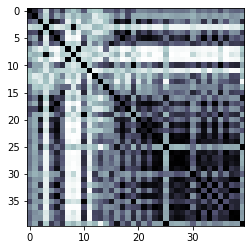

In [27]:
print('ketnal matrix during the training')
kernel_matrix = result['kernel_matrix_training']
img = plt.imshow(np.asmatrix(kernel_matrix),interpolation='nearest',origin='upper',cmap='bone_r')
plt.show()

In [28]:
predicted_labels = svm.predict(datapoints[0])
predicted_classes = map_label_to_class_name(predicted_labels,svm.label_to_class)
print('ground truth: {}'.format(datapoints[1]))
print('predicted: {}'.format(predicted_labels))
print('testing success ratio :',result['testing_accuracy'])

ground truth: [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
predicted: [0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1]
testing success ratio : 0.85
